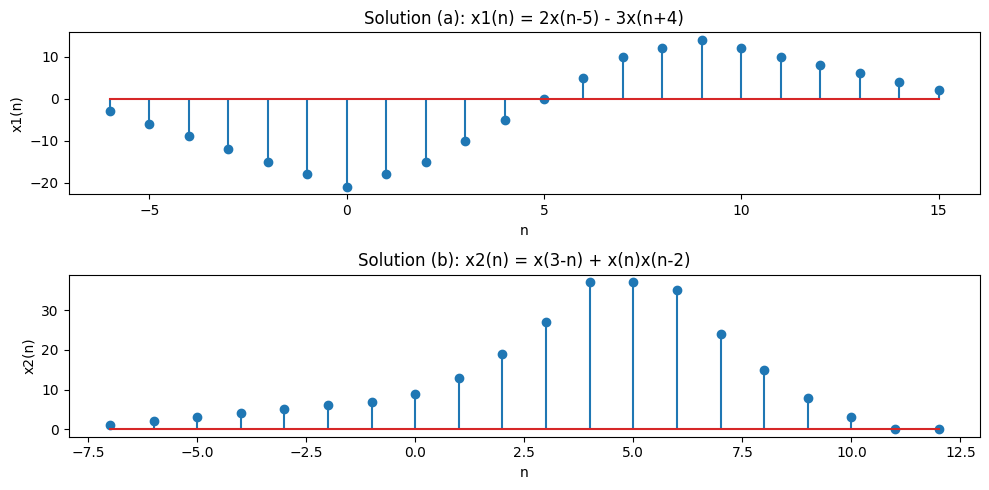

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def sigshift(x, n, k):
    """Shift signal by k units."""
    return x, n + k

def sigadd(x1, n1, x2, n2):
    """Add two signals."""
    n = np.arange(min(min(n1), min(n2)), max(max(n1), max(n2)) + 1)
    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))
    y1[(n >= min(n1)) & (n <= max(n1))] = x1
    y2[(n >= min(n2)) & (n <= max(n2))] = x2
    return y1 + y2, n

def sigfold(x, n):
    """Fold signal (time reversal)."""
    return np.flip(x), -np.flip(n)

def sigmult(x1, n1, x2, n2):
    """Multiply two signals."""
    n = np.arange(min(min(n1), min(n2)), max(max(n1), max(n2)) + 1)
    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))
    y1[(n >= min(n1)) & (n <= max(n1))] = x1
    y2[(n >= min(n2)) & (n <= max(n2))] = x2
    return y1 * y2, n

# Common data
n = np.arange(-2, 11)
x = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])

# Solution (a): x1(n) = 2x(n-5) - 3x(n+4)
x11, n11 = sigshift(x, n, 5)
x12, n12 = sigshift(x, n, -4)
x1, n1 = sigadd(2 * x11, n11, -3 * x12, n12)

# Plot Solution (a)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(n1, x1)  # Removed use_line_collection
plt.title('Solution (a): x1(n) = 2x(n-5) - 3x(n+4)')
plt.xlabel('n')
plt.ylabel('x1(n)')

# Solution (b): x2(n) = x(3-n) + x(n)x(n-2)
x21, n21 = sigfold(x, n)
x21, n21 = sigshift(x21, n21, 3)
x22, n22 = sigshift(x, n, 2)
x22, n22 = sigmult(x, n, x22, n22)
x2, n2 = sigadd(x21, n21, x22, n22)

# Plot Solution (b)
plt.subplot(2, 1, 2)
plt.stem(n2, x2)  # Removed use_line_collection
plt.title('Solution (b): x2(n) = x(3-n) + x(n)x(n-2)')
plt.xlabel('n')
plt.ylabel('x2(n)')

plt.tight_layout()
plt.show()


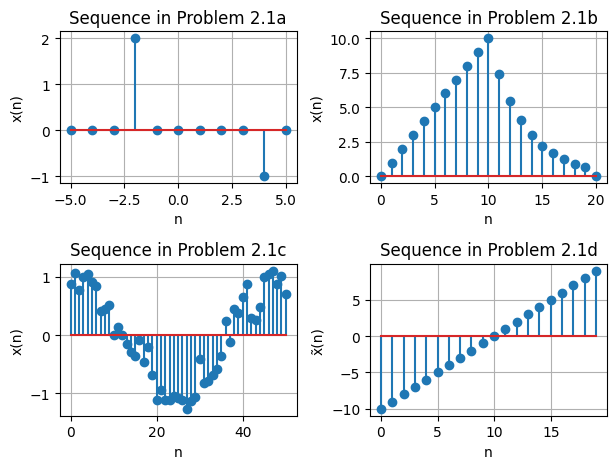

In [4]:

# Function for generating impulse sequence
def impseq(n0, n1, n2):
    n = np.arange(n1, n2+1)
    x = (n == n0).astype(int)
    return x, n

# Function for generating step sequence
def stepseq(n0, n1, n2):
    n = np.arange(n1, n2+1)
    x = (n >= n0).astype(int)
    return x, n

# Part a: x(n) = 2δ(n+2) - δ(n-4), -5 ≤ n ≤ 5
n_a = np.arange(-5, 6)
x_a1, _ = impseq(-2, -5, 5)
x_a2, _ = impseq(4, -5, 5)
x_a = 2 * x_a1 - x_a2
plt.subplot(2, 2, 1)
plt.stem(n_a, x_a)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Sequence in Problem 2.1a')
plt.grid(True)

# Part b: x(n) = n[u(n) - u(n-10)] + 10e^(-0.3(n-10))[u(n-10) - u(n-20)], 0 ≤ n ≤ 20
n_b = np.arange(0, 21)
u_n, _ = stepseq(0, 0, 20)
u_n10, _ = stepseq(10, 0, 20)
u_n20, _ = stepseq(20, 0, 20)

x1_b = n_b * (u_n - u_n10)
x2_b = 10 * np.exp(-0.3 * (n_b - 10)) * (u_n10 - u_n20)
x_b = x1_b + x2_b
plt.subplot(2, 2, 2)
plt.stem(n_b, x_b)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Sequence in Problem 2.1b')
plt.grid(True)

# Part c: x(n) = cos(0.04πn) + 0.2w(n), 0 ≤ n ≤ 50
n_c = np.arange(0, 51)
x_c = np.cos(0.04 * np.pi * n_c) + 0.2 * np.random.randn(len(n_c))
plt.subplot(2, 2, 3)
plt.stem(n_c, x_c)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Sequence in Problem 2.1c')
plt.grid(True)

# Part d: x(n) = {...,5,4,3,2,1,5,4,3,2,1,...}, -10 ≤ n ≤ 9
n_d = np.arange(-10, 10)
x_d = [5, 4, 3, 2, 1]
# Repeat the sequence to cover the range of n_d
xtilde = np.tile(x_d, int(np.ceil(len(n_d) / len(x_d))))
xtilde = xtilde[:len(n_d)] # Trim to the length of n_d
plt.subplot(2, 2, 4)
plt.stem(n_d)
plt.xlabel('n')
plt.ylabel('x̃(n)')
plt.title('Sequence in Problem 2.1d')
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
